In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("DS.csv", header=None)

data = data.iloc[1:, :].reset_index(drop=True)

# Convert all data to numeric, just in case the first row affected the dataset
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Select appropriate columns: 1st and 2nd as features (X1, X2) and 3rd as target (Y)
x = data.iloc[:, :2].values
y = data.iloc[:, 2].values.reshape(-1, 1)

# Normalize the independent variables (X1 and X2)
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Add a column of ones to X for the bias term
x = np.hstack((np.ones((x.shape[0], 1)), x))

print("Data successfully loaded and processed!")


Data successfully loaded and processed!


In [12]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(x, y, theta):
    m = len(y)
    h = sigmoid(np.dot(x, theta))
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


In [13]:
# Gradient Descent
def gradient_descent(x, y, theta, lr, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(x, theta))
        gradient = (1 / m) * np.dot(x.T, (h - y))
        theta -= lr * gradient
        costs.append(compute_cost(x, y, theta))
    return theta, costs

# Initialize parameters
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
iterations = 1000

# Train the model
theta, costs = gradient_descent(x, y, theta, learning_rate, iterations)

# Final cost
final_cost = costs[-1]
print(f"Final cost: {final_cost:.4f}, Parameters: {theta.ravel()}")


Final cost: 0.2291, Parameters: [ 0.32395465  2.38613663 -2.49462467]


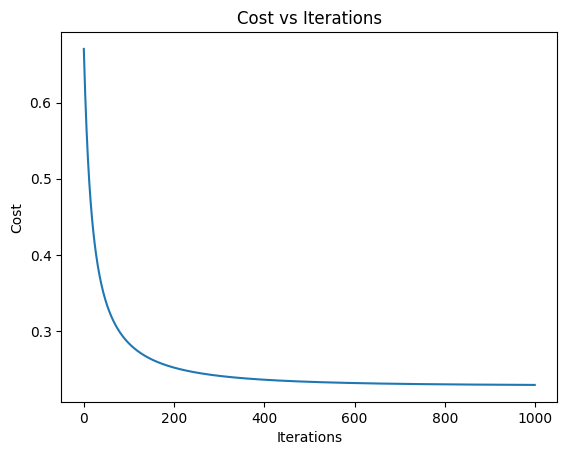

In [14]:
# Plot cost vs iterations
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


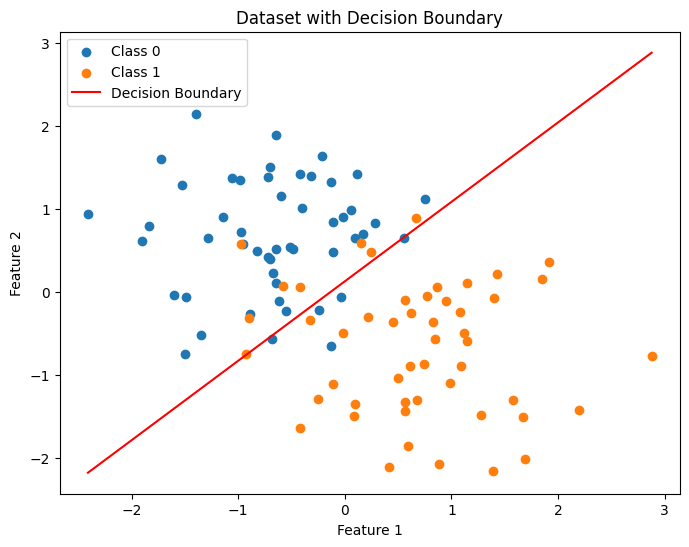

In [15]:
# Plot dataset with decision boundary
plt.figure(figsize=(8, 6))

# Separate classes for plotting
for label in np.unique(y):
    plt.scatter(x[y.ravel() == label, 1], x[y.ravel() == label, 2], label=f'Class {int(label)}')

# Plot decision boundary
x_boundary = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, 'r', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.legend()
plt.show()


In [16]:
# Prediction function
def predict(x, theta):
    return (sigmoid(np.dot(x, theta)) >= 0.5).astype(int)

# Predictions
y_pred = predict(x, theta)

# Confusion matrix
confusion_matrix = np.array([
    [(y_pred[y == 0] == 0).sum(), (y_pred[y == 0] == 1).sum()],
    [(y_pred[y == 1] == 0).sum(), (y_pred[y == 1] == 1).sum()]
])

# Metrics calculation
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("Confusion Matrix:")
print(confusion_matrix)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")


Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87, Precision: 0.89, Recall: 0.84, F1-Score: 0.87
